In [ ]:
%matplotlib notebook

In [1]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [2]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20

# Code Here
samples = [housing_data.sample(div) for x in range(0,nsamples)]
print(type(samples))
print(samples[16].shape)
print(samples[16])

<class 'list'>
(20, 9)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
13647  1.9375      40.0  4.287846   1.055437      1528.0  3.257996     34.08   
15220  5.4584       3.0  6.033161   1.152332      7644.0  2.640415     32.97   
13316  2.5677      16.0  4.326134   1.151188      5110.0  3.678906     34.07   
11401  7.6709      17.0  7.691379   1.008621      2095.0  3.612069     33.72   
18300  5.4063      36.0  5.378652   1.011236      2039.0  2.291011     37.41   
11532  1.7675      26.0  3.847093   1.082556      1829.0  1.312994     33.77   
15549  2.5331      31.0  4.096677   0.978852      1301.0  3.930514     33.11   
17952  3.7813      37.0  5.022727   0.962121       293.0  2.219697     37.34   
2740   3.1597      29.0  6.400000   1.155102       848.0  3.461224     32.78   
19721  2.1250      45.0  6.213235   1.139706       343.0  2.522059     39.14   
13991  3.6343      28.0  6.861004   1.185328       721.0  2.783784     34.96   
8880   4.8125    

In [18]:
# Calculate means
means = [s['MEDV'].mean() for s in samples]
    
means
# Calculate standard error on means
sems = [sem(s['MEDV']) for s in samples]

sems


[0.24175846467026477,
 0.24372696220415,
 0.2808426033952629,
 0.19042653335410786,
 0.17237006204522198,
 0.3129657963918699,
 0.23058187722642723,
 0.24482475856316724,
 0.2669228643757701,
 0.2872005331333015,
 0.25076114701095537,
 0.3352423703015594,
 0.2545586120031826,
 0.3270560516553015,
 0.36079511664596975,
 0.26230960108988427,
 0.16758300182297728,
 0.24483120286176113,
 0.31847343931298583,
 0.24335589855889642,
 0.21925211887048512,
 0.3105897437897272,
 0.2672429790816235,
 0.22295905217633222,
 0.22158704212304944]

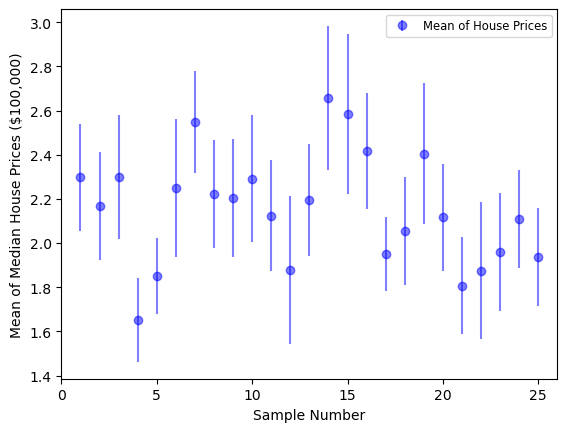

In [19]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($100,000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [20]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 0.19321211482299247


In [21]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 0.16758300182297728
The sample with the smallest SEM is sample 17


In [23]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index]['MEDV'].mean()}")
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")

The mean of the sample 5 is 2.0580505
The mean of the population data set is 2.068558169089147
